# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [7]:
# Create a Beautiful Soup Object
mars_temp_html = browser.html
soup = BeautifulSoup(mars_temp_html, 'html.parser')

In [8]:
# Extract all rows of data
rows = soup.find_all('tr')

In [11]:
# Create an empty list
mars_data = []
header_check = True
# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = []
    if header_check:
        headers = row.find_all('th')
        for header in headers:
            row_data.append(header.text)
        mars_data.append(row_data)
        header_check = False
    else:
        all_data = row.find_all('td')
        for data in all_data:
            row_data.append(data.text)
        mars_data.append(row_data)



In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data[1:], columns=mars_data[0])

In [13]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [14]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['month'] = mars_df['month'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype('float64')
mars_df['pressure'] = mars_df['pressure'].astype('float64')

In [16]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
# 1. How many months are there on Mars?
mars_df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [18]:
# 2. How many sols (Martian days) worth of data are there?
mars_df['terrestrial_date'].count()

1867

In [19]:
# 3. What is the average minimum temperature by month?
mars_df.groupby('month')['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

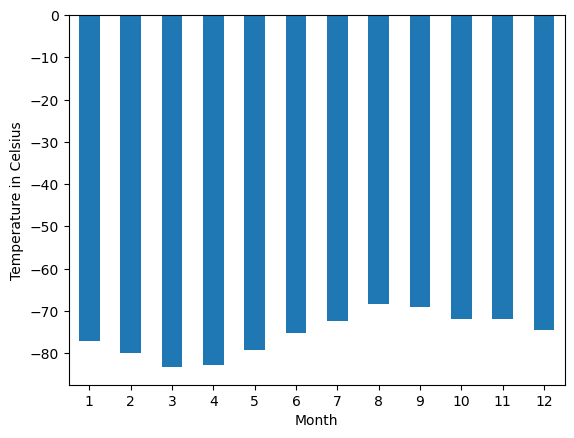

In [20]:
# Plot the average minimum temperature by month
mars_df.groupby('month')['min_temp'].mean().plot(kind='bar', xlabel='Month', ylabel='Temperature in Celsius', rot=360)
plt.show()

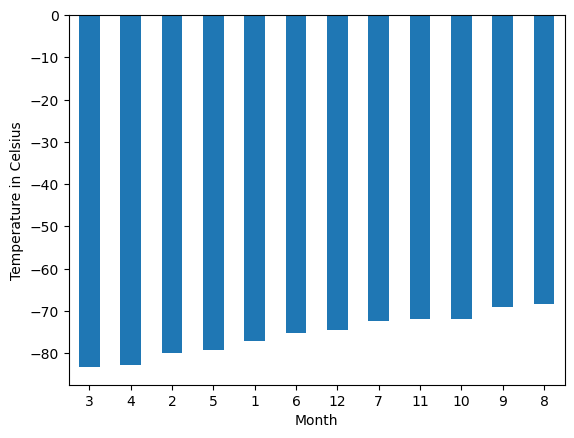

In [21]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
mars_df.groupby('month')['min_temp'].mean().sort_values().plot(kind='bar', xlabel='Month', ylabel='Temperature in Celsius', rot=360)
plt.show()

In [22]:
# 4. What is the average pressure by month?
mars_df.groupby('month')['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

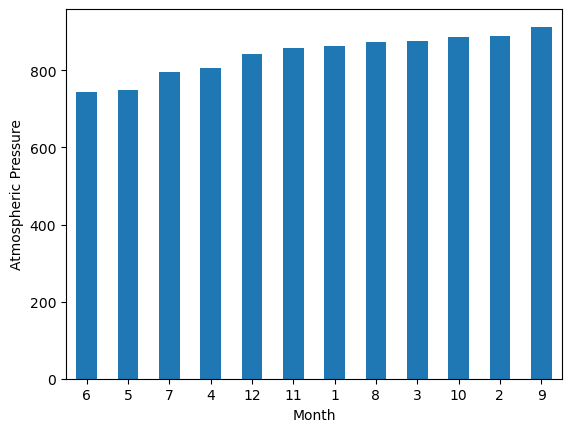

In [23]:
# Plot the average pressure by month
mars_df.groupby('month')['pressure'].mean().sort_values().plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure', rot=360)
plt.show()

In [24]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph


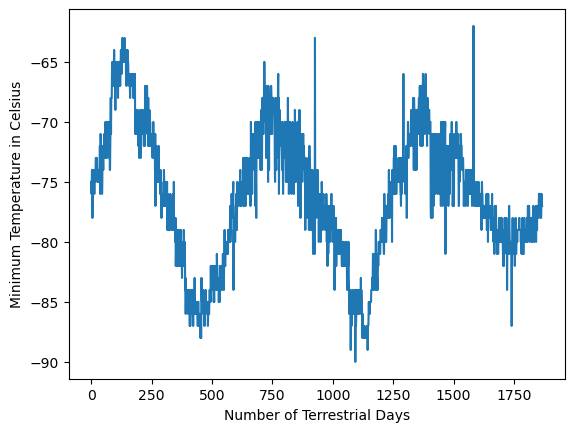

In [25]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df['min_temp'].plot(use_index=True, xlabel='Number of Terrestrial Days', ylabel='Minimum Temperature in Celsius')
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
mars_df.to_csv('mars_weather.csv')

In [27]:
browser.quit()